# Network Analysis for Risk Assessment


###### Idenfying Contagious Risks with Network Analysis in Python

The world is moving at a very fast pace, increasingly being dominated by new technology and emerging business models, while Risk is getting more interconnected like never before. As a result of this rapid growth in technology, the past can no longer be solely relied on as a guide to the future. Risks are evolving, they combine, they spill over into each other and do not manifest in isolation. Thus, dealing with risks discretely is no longer sufficient in the Enterprise Risk Assessment process.

Traditional Risk Assessment may be insufficient, without considering Risks that trigger other Risks (Contagious Risks) and to what extent (Velocity). Two-dimensional Risk Management methodologies that focus on single points of risk by measuring the high likelihood and severity, may provide only limited value and insights in increasingly complex and globally interconnected organizations. Instead, we need to consider additional dimensions of risks, by asking questions about how risks are interconnected, the strength of these interconnections, how risks potentially cluster together, as well as the potential cumulative impact of such clusters.

For example, a risk identified during an initial risk assessment workshop may be Liquidity Risk. While stakeholders may agree that this is a medium Risk, there is a need to go a step further and establish what other risks could be triggered by the manifestation of this risk, and possibly, what other risks could those risks trigger. 

This gets complicated using the traditional analytics approach, especially when you have a large pool of risks to analyze. The top ten (10) risks, in this case, should not just be limited to severity and impact, but also include the third and fourth dimensions of contagion and velocity. 

Risks such as Natural Disasters, Infectious Diseases, Critical Infrastructure failure, and Climate Change are likely to be regarded as low likelihood risks, due to the very low probability that the risks could crystalize. They could, however, have a devastating effect on an organisation in the short and long term, should they crystalize. The effects could even be more devastating if they trigger other critical high risk areas. Organisations, therefore, need to be adequately equipped to respond to these Risks. 

For example, the recent COVID-19 crisis has triggered certain unanticipated risks, which organisations are struggling to mitigate. An outbreak of Infectious Diseases like this could trigger operational risks, sourcing risks, working capital risks, etc. in ways that the organisation could not have anticipated. However, having an understanding of which risks could be triggered by a sudden outbreak, and to what extent it can devastate the operations will enable organisations better plan for eventualities.

Graph Networks and Risk Assessment:

A graph network is a collection of interconnected nodes. The nodes represent entities and the properties of the entities are embedded within these nodes, while the connections with other nodes represent the relationships. For Risk Assessment purposes, we can represent the risks as a node within the network, each node (risk) will have properties such as likelihood and impact. Risk Interconnectedness will be depicted by creating connections between the risks that affect/ trigger each other, while the strength of this connection will be represented by the thickness of the connection.

We can then deploy algorithms to analyze the graph networks, obtain valuable insights about the network properties, and also to rank the risks based on their interconnectedness, as a more analytical approach to deriving top risks which an organisation should focus its limited resources to mitigate.

Additionally, we can use advanced algorithms to create risk clusters within our network, that provide information on how risks are interrelated and which risks are likely to trigger each other.

An example of graph network applied in risk assessment can be seen in the World Economic Forum Report on The Global Risks Interconnections 2020, where the traditional approach was taken a step further and survey respondents were asked to select up to six pairs of global risks they believe to be most interconnected. 
(http://reports.weforum.org/global-risks-report-2020/survey-results/the-global-risks-interconnections-map-2020/#risks///)


#####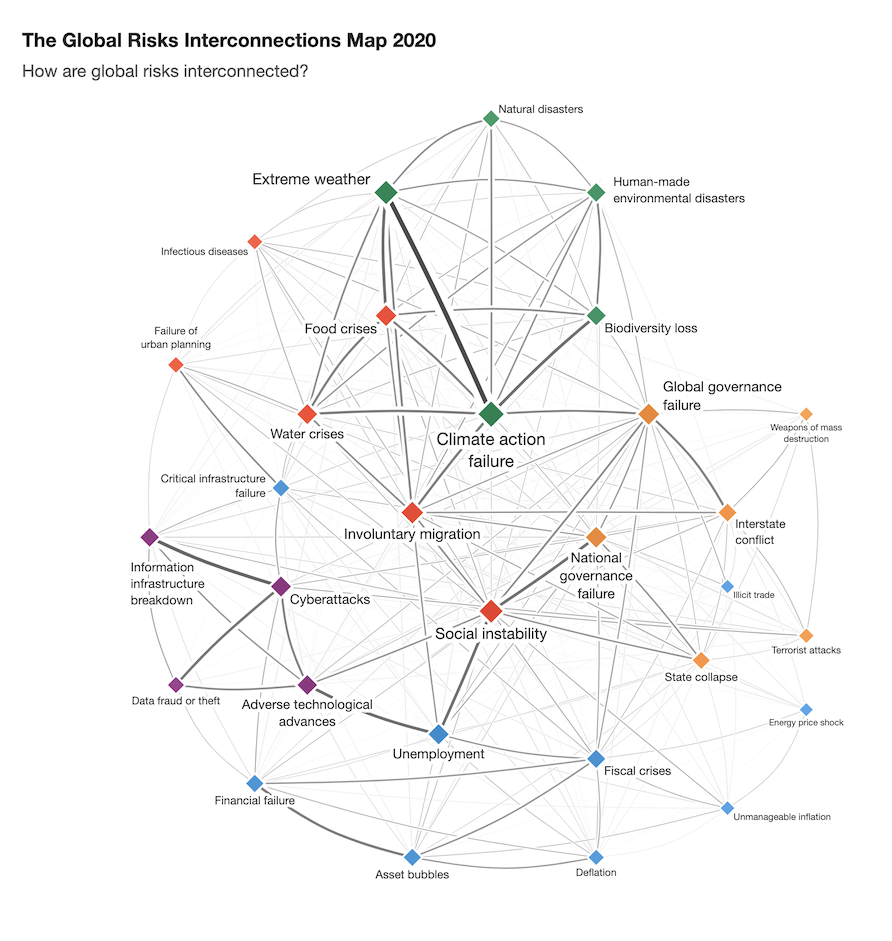

In the section below, we will attempt a basic example of how graph networks can be deployed during risk assessment to help analyzed and categorize risks. We will be making use of a python library, Network X, for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. The official documentation can be found here: https://networkx.github.io/documentation/latest/_downloads/networkx_reference.pdf

The data we will use for this analysis is hypothetical data from a fictional risk assessment workshop, which already has the defined risk levels, severity, connections and strength of connections.

In [239]:
# Import Required Libraries

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

We import 2 files, a file that contains the data, and a mata data file we will use for our heat map. A brief explanation of the data:

The data contains two colums of risk and connected risks, the strength of the connection, risk ratins, and severity, denoted by the node sizes. In a typical risk assessment, these values will have been prefdifiend in a risk assessment workshop.

In [240]:
#import required files, and the color map data used for the node colors 

all_risks=pd.read_excel(r"/Users/stephensanwo/Documents/Projects/Articles/RIsk Assessment Network Analysis/Network Analysis/Risk Data.xlsx") 
cdata = pd.read_excel(r"/Users/stephensanwo/Documents/Projects/Articles/RIsk Assessment Network Analysis/Network Analysis/Color Data.xlsx")

In [241]:
all_risks.head()

,Risk,Connected Risk,Strength of Connection
0,Third Party Risk,Socio-Political Risk,1
1,Third Party Risk,Disaster & Market Crash,1
2,Third Party Risk,Working Capital Risk,5
3,Third Party Risk,Competition Risk,1
4,Third Party Risk,Capital Adequacy,1


In [242]:
cdata.head()

,Risk,Impact,Likelihood
0,Third Party Risk,High,3000
1,Socio-Political Risk,High,1000
2,Disaster & Market Crash,High,3000
3,Macroeconomic Risk,High,1000
4,Interest Rate Risk,High,1000


In [243]:
all_risks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 3 columns):
Risk                      170 non-null object
Connected Risk            170 non-null object
Strength of Connection    170 non-null int64
dtypes: int64(1), object(2)
memory usage: 4.1+ KB





We define the color map for our risk analysis, by using the already familiar colors, red (High Risk), amber (Medium Risk) and green (Low Risk).

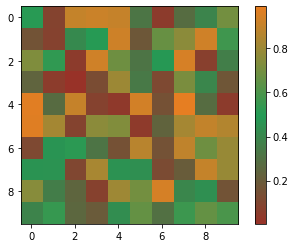

In [244]:
#Create a color map for the heatmap
cmap = LinearSegmentedColormap.from_list('mycmap', ['#983228', '#239b56', '#e67e22'])

fig, ax = plt.subplots()
im = ax.imshow(np.random.random((10, 10)), cmap=cmap, interpolation='nearest')
fig.colorbar(im)
plt.show()

To implement our graph, we need to define the origin, and the target (to what node is the origin connected?). In our case study, the origin will be the risk column, while the target will be the connected risk. We can then construct our graph using nx. 

In [245]:
G=nx.from_pandas_edgelist(all_risks, source = 'Risk', target = 'Connected Risk', create_using=nx.Graph() )

In [246]:
# To check the properties of our graph, we can use nx.info

print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 33
Number of edges: 85
Average degree:   5.1515


The data has a total of 33 nodes, which is the total number of unique risks in the graph. and also the 85 edges between 33 nodes, which tells us about the total connectoions in the graph

Before we can draw out network graph, we need to process the variables required for the network chart. which include: -node color: Impact/ Severity
-node sizes: Likelihood

In [247]:
risk_rating= cdata[['Risk', 'Impact']].set_index('Risk')
#risk_rating=risk_rating.reindex(G.nodes())

In [248]:
risk_rating.head()

,Impact
Risk,
Third Party Risk,High
Socio-Political Risk,High
Disaster & Market Crash,High
Macroeconomic Risk,High
Interest Rate Risk,High


For the risk rating/ node color, we need to initialize the risk rating as numeric categorical variables, before we can parse it into the network. High Risk will be 0, Medium Risk is 1 and low risk is 2.

In [249]:
risk_rating['myvalue']=pd.Categorical(risk_rating['Impact'])
#risk_rating['myvalue'].cat.codes

Then we set the node sizes, remember that the node sizes represent the liklihood of the risk. we do this by creating a pandas series of the risk and the predefined node sizes. In our data, we have abituariy repsented Unlikely as 1000, Possible as 3000 and > Probable as 5000

In [250]:
node_sizes = cdata[['Risk', 'Likelihood']].set_index('Risk')
node_sizes=node_sizes.reindex(G.nodes())

In [251]:
node_sizes['myvalue']=pd.Categorical(node_sizes['Likelihood'])
#node_sizes['myvalue'].cat.codes

In [252]:
node_sizes['myvalue']

Risk
Third Party Risk              3000
Socio-Political Risk          1000
Disaster & Market Crash       3000
Working Capital Risk          3000
Competition Risk              5000
Capital Adequacy              5000
Operational Risk              1000
Fraud and Theft Risk          5000
HSE                           3000
Regulatory Risk               5000
Retail Outlets                1000
Macroeconomic Risk            1000
Interest Rate Risk            1000
Credit Risk                   3000
Strategy Risk                 1000
People Risk                   1000
Customer Satisfaction Risk    1000
Product Development Risk      1000
Reputational Risk             1000
Legal Risk                    5000
Business Process Breakdown    3000
Plant Operations Risk         1000
Financial Reporting Risk      3000
IT & Cyber Security           1000
Transfer Pricing Risk         1000
Governance Risk               1000
Investment Risk               1000
Retail Office Management      1000
Project Risk   

Then we can initialize the edge parameter, by parsing the strength of connection into a list. Remember that the strength of connection will be depicted by the thickness of the connections between the nodes. We have defined three categories of strengths namely: - Strong (10), Medium (5), weak (1).

In [253]:
strength_of_connection = all_risks[['Risk', 'Strength of Connection']].set_index('Risk')
node_sizes=node_sizes.reindex(G.nodes())

In [254]:
strength_of_connection['Strength of Connection']=pd.Categorical(strength_of_connection['Strength of Connection'])
#strength_of_connection['Strength of Connection'].cat.codes

In [255]:
strength_of_connection_color = list(strength_of_connection['Strength of Connection'].replace({1:"#f4d03f", 5: "#f1c40f", 10: "#d4ac0d"}))[:85]

We can now use our predefined parameters to plot our network by caling nx.draw and passing in the node_color, representing the Impact, the node_size, representing the likelihoo, the width, representing the strength of connection between two nodes. We used fruchterman_reingold_layout for the pos parameter because it helps cluster the most dense nodes together, which is more visually easy to read

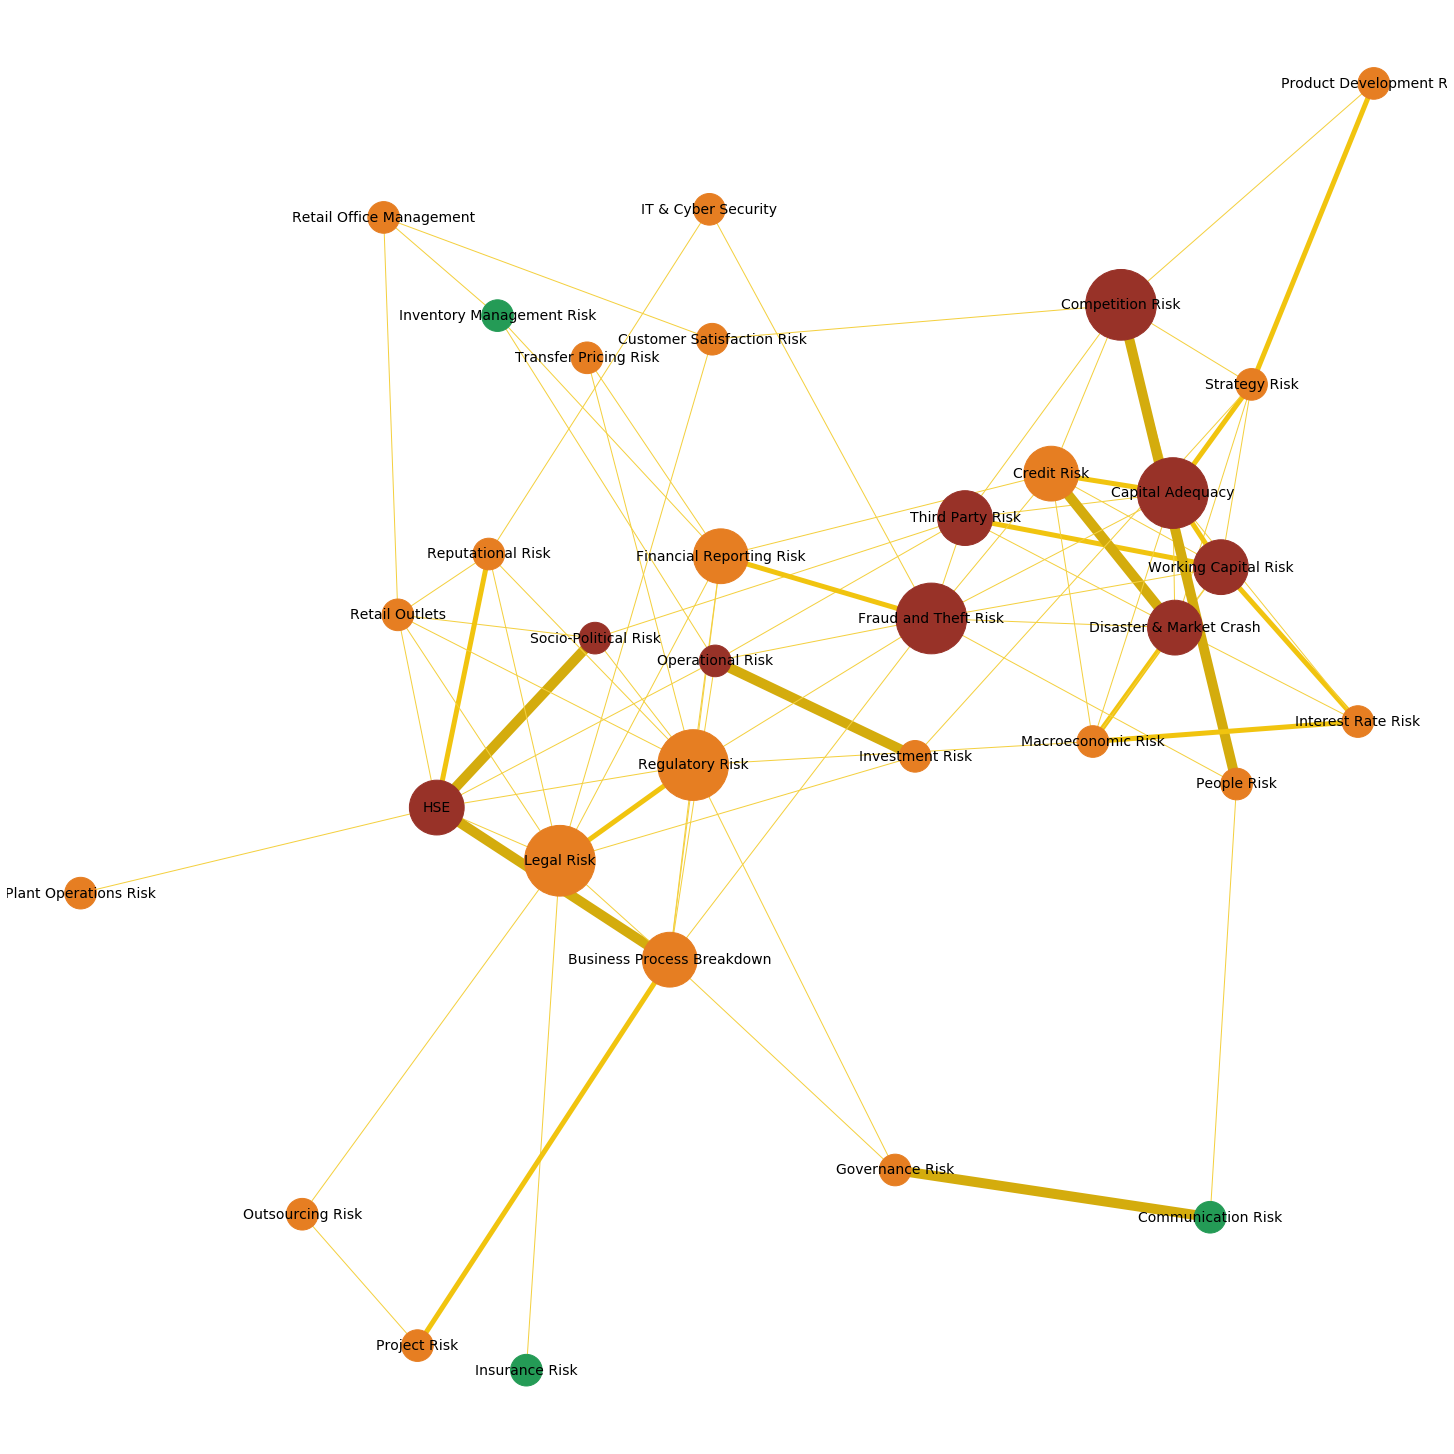

In [259]:
plt.figure(3,figsize=(20,20),facecolor = '#ededed') 
nx.draw(G, with_labels=True, node_color=risk_rating['myvalue'].cat.codes, node_size=node_sizes['myvalue'], width=list(strength_of_connection['Strength of Connection']), cmap=cmap, font_size=14,font_family='sans-serif', font_color = 'black', edge_color = strength_of_connection_color, pos=nx.fruchterman_reingold_layout(G))
plt.show()

### Analysing the Network

#### Network Centrality Measures

Network Centrality Measures allows us to identify the most important nodes of a Graph. There are a number of centrality measures that can be deployed to explore a wide variety of characteristics of our network. For our analysis however, we will be only concerned with those that can help with gaining valuable insights to aid our risk assessment process. Looking at the Network Graph above, the question that comes to mind immediately is, how do we make sense of this? how do we tell what are the most influential nodes in our Network? which nodes have the most interconnections? with these information, we can identify the most contagious risks in our network.

##### Degree Centrality :
    
This is the first centrality measure we will look at. Degree Centrality is based on the assumption that important nodes have many connections. As expected we can infer that the risks with the most connections are the more contagous risks.

Degree Centrality is calculated using the equation below:

Centrality_{degree}(v) = dv/(|N|-1)

Where dv is the Degree of node v and N is the set of all nodes of the Graph.

This returns a dictionary of size equal to the number of nodes in Graph G, where the ith element is the degree centrality measure of the ith node.

In [260]:
deg_centrality = nx.degree_centrality(G) 
deg_centrality

degree_of_centrality = pd.DataFrame(data =deg_centrality, index = ["degree"] )
degree_of_centrality.transpose().sort_values(by="degree", ascending = False).head(10)

,degree
Fraud and Theft Risk,0.34375
Regulatory Risk,0.34375
Legal Risk,0.31250
Capital Adequacy,0.28125
Disaster & Market Crash,0.25000
Working Capital Risk,0.25000
Business Process Breakdown,0.25000
HSE,0.25000
Third Party Risk,0.21875
Credit Risk,0.21875


From our analysis, we can see the to 10 risks based on their contagion (how connected they are) Fraud Risk is the most contagious risk.

##### Betweenness Centrality :

This centrality measure assumes that important nodes connect other nodes. 
The equation for calculating Betweenness Centrality is as follows:

Centrality_{betweenness}(v) = \Sigma_{s, t \epsilon N}(\sigma_{s, t}(v)/\sigma_{s, t}) where \sigma_{s, t} is the number of shortest paths between nodes s and t. \sigma_{s, t}(v) is the number of shortest paths between nodes s and t that pass through v.



In [261]:
bet_centrality = nx.betweenness_centrality(G, normalized = True, endpoints = False)
bet_centrality

betweeness_centrality = pd.DataFrame(data =bet_centrality, index = ["degree"] )
betweeness_centrality.transpose().sort_values(by="degree", ascending = False).head(10)

,degree
Legal Risk,0.193663
Fraud and Theft Risk,0.183412
Regulatory Risk,0.181386
Business Process Breakdown,0.103135
Competition Risk,0.090891
HSE,0.083081
Financial Reporting Risk,0.078644
Operational Risk,0.060465
Third Party Risk,0.050045
Macroeconomic Risk,0.045718


From our analysis, we can see that Legal Risk is now the most contagious risk. This is because Legal risk is conected to more risks overall than just the number of adjacent risks for fraud

#### Page Rank Algorithm (Random Walk)

Page Rank Algorithm was developed by Google to measure the importance of webpages from the hyperlink network structure. 
Page Rank assigns a score of importance to each node. The importance of a node is measured by how many inlinks a page has from important pages. 

Deploying a pagerank algorithm is another way we can rank the risks considering its connections and also the conncetions of its connections. Thus it factors the connections of connections in computing a centrality degree. This is expected to give a better measure of risk contagion, that the degree centrality, as risks are not only connected to the adjacent risks, but they are also linked with the connections of thier connections. For example in practice, a low risk could be triggered that could trigger a medium risk that then triggers a high risk. although the probability of this happening is closer to zero than 1. 


We will use PageRank to estimate a node’s importance from its linked neighbors and then again from their respective neighbors. This will help identify influential risks (nodes) in our network. 

PageRank is computed by either iteratively distributing one node’s rank (originally based on the degree) over its neighbors or by randomly traversing the graph and counting the frequency of hitting each node during these walks. This is known as Random Walk

In [262]:
pr = nx.pagerank(G)

In [263]:
node_rank= pd.DataFrame(list(pr.items()), columns=['Risk', 'Rank'])

In [264]:
node_rank.sort_values('Rank', ascending = False, inplace = True)

In [266]:
node_rank

,Risk,Rank
19,Legal Risk,0.061313
9,Regulatory Risk,0.060921
7,Fraud and Theft Risk,0.057555
8,HSE,0.047946
20,Business Process Breakdown,0.046910
5,Capital Adequacy,0.044980
4,Competition Risk,0.040185
3,Working Capital Risk,0.040089
2,Disaster & Market Crash,0.040089
22,Financial Reporting Risk,0.040020


#### Conclusion:

The page rank algorithm gives a better approach to identifying contagious risks, based on the fact that it considers all connections (n) to a risk (r). In our analysis above, Legal Risk is highlighted as the most contagious risk, while plant operations risk is the least contagious risk. To do this manually, we would have to compute the number of risks a risk (r) is connected to and the number of risks its connections are connected to for as many iterations as we need to. This becomes even more difficult if you have a network of a huge number of risks and edges.

With Network Analysis, organisations can better visualize how risks are connected and apply a more mathematical approach to identifying top 10 risks to focus on. This will help organisations prioritize risk mitigation strategise, especially when there are limited resources.